# Graphs I
## Visualizing Graphs

Before we want to learn how to train a model on a GNN, it makes sense to visualize a graph first. Not only that this gives us a better understanding of what a graph looks like, we will also see which attributes are important.    

<br>

**0) Loading Libraries**

First, we load our standard libraries as usual

In [27]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Next, we load a library for displaying a graph

In [29]:
import networkx as nx #pip install networkx

<br>

**1) Social Network**

A common example of a graph is a social network. The people are represented by the nodes and the relations between those people are the edges. *Relation* can mean anything that is relevant for a particular analysis. It could refer to *knowing each other*, or sending messages to eachother etc.<br>
In order to make the example more realistic, we will label the nodes with actual names and therefore load the names file first.

In [31]:
Names = open('names.txt','r').read().splitlines()

In [33]:
print(Names[:15])

['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia', 'harper', 'evelyn', 'abigail', 'emily', 'elizabeth', 'mila', 'ella']


The edges of an unweighted graph can be simply represented by a list containing tuples which themselves contain the index of the start node and the index of the end node.<br>
We generate the edges randomly:

In [35]:
Nmax  = 50                                  # maximum number of nodes
Names = Names[:Nmax]

N1 = Nmax/2 + Nmax*np.random.randn(10*Nmax)# randomly picking nodes. Some people know more than others --> normal distibution
N1 = N1.astype(int)                        # indices are integer
N1[N1>=Nmax] = Nmax-1                      # making sure that max<=Nmax
N1[N1<0]     = 0

N2 = np.random.randint(1, Nmax,(10*Nmax,))

#now: Edges
Relation = [None] *len(N1)

for i, (j, k) in enumerate(zip(N1,N2)):
    Relation[i] = (Names[j], Names[k])

In [37]:
print(Relation[:15])

[('emma', 'eleanor'), ('emma', 'elizabeth'), ('emma', 'luna'), ('grace', 'isabella'), ('skylar', 'stella'), ('emma', 'elizabeth'), ('emma', 'victoria'), ('emma', 'victoria'), ('emma', 'zoey'), ('skylar', 'camila'), ('nora', 'zoey'), ('skylar', 'savannah'), ('emma', 'bella'), ('elizabeth', 'aria'), ('skylar', 'violet')]


<br>

**2) Building and visualizing the graph**

A graph is defined by nodes and edges. Therefore, we already have everything we need and can move on to construct the graph.

In [39]:
My_NW = nx.Graph()

In [41]:
My_NW.add_nodes_from(Names)
My_NW.add_edges_from(Relation)

The nx library provides different layouts for visualizing the graph, see [graph gallery](https://python-graph-gallery.com/322-network-layout-possibilities/). We pick one particular layout and also assign the node labels (needs to be a dictionary) and the edge colors.

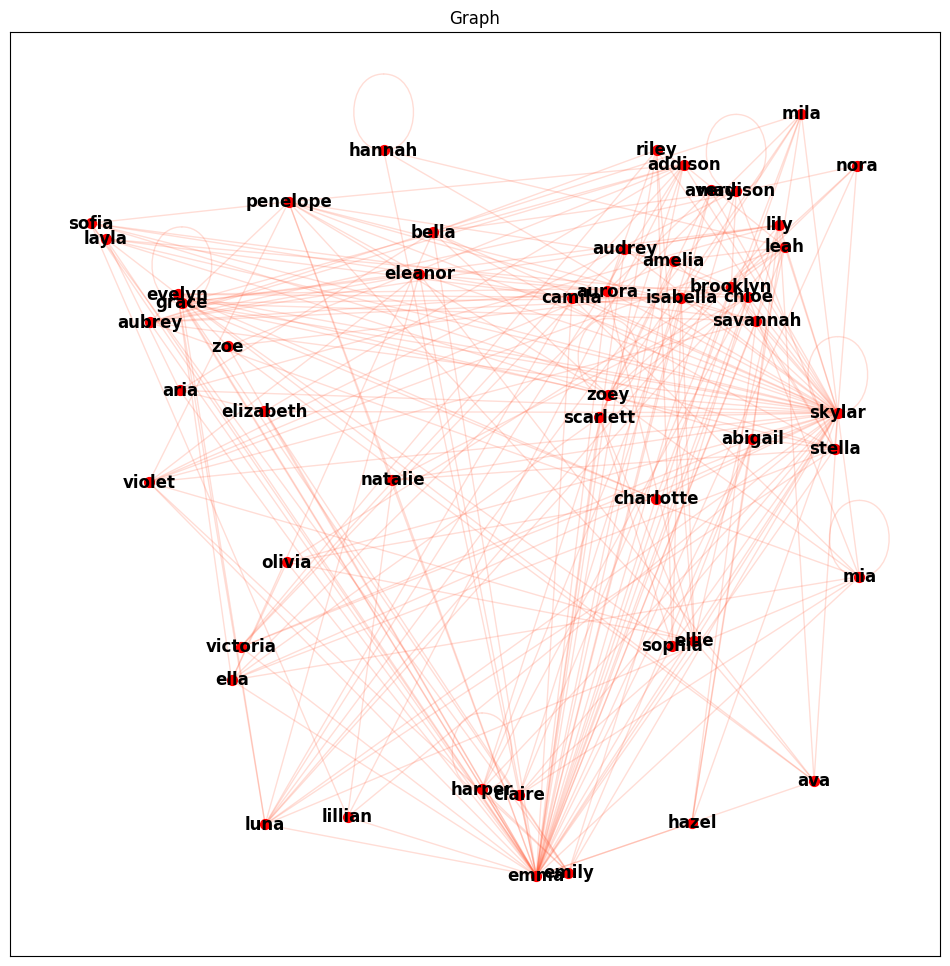

In [43]:
pos = nx.random_layout(My_NW)  # positions for all nodes
plt.figure(3,figsize=(12,12)) 
nx.draw_networkx_nodes(My_NW, pos, node_color = 'red', node_size = 50)

nx.draw_networkx_labels(My_NW, pos,\
                        labels = {name: name for name in Names},\
                        font_size = 12, font_weight = 'bold')
nx.draw_networkx_edges(My_NW, pos, alpha = 0.2, edge_color = '#ff5733')
plt.title("Graph")
#plt.savefig('Graph1.pdf', dpi = 1200)
plt.show()

In some cases you might see loops. This is because we generated the edges randomly. Loops correspond to non-zeros in the adjacency matrix and can actually play a role, such as in chemical pathways.<br>
We can analyze the graph in various ways. For example we can sort the nodes (people) according to how many other people they know, i. e. how many connections (= node degree) they have.

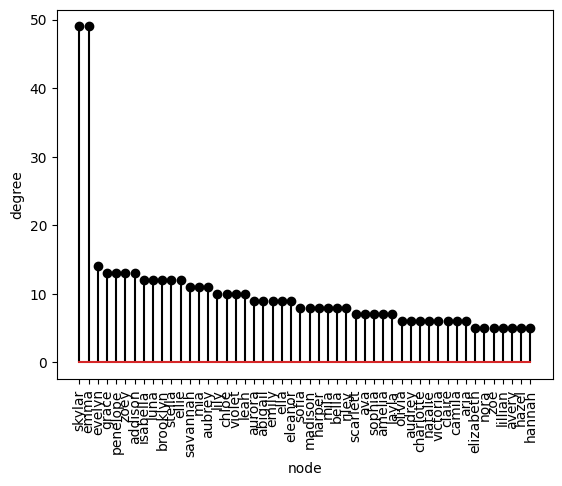

In [45]:
D = np.zeros((Nmax,))

for i, name in enumerate(Names):
    D[i] = My_NW.degree[name]
    
degrees_idx    = D.argsort()
degrees_sorted = D[degrees_idx[::-1]]
Names_sorted   = [Names[int(i)] for i in degrees_idx[::-1]]

plt.stem(degrees_sorted, 'k')
plt.ylabel('degree')
plt.xticks(ticks = range(Nmax), labels = Names_sorted)
plt.xticks(rotation = 90)
plt.xlabel('node')
plt.show()

<br>

As in real life: a few people know many, and many people know only a few.

We can also explore the adjacency matrix as wel.

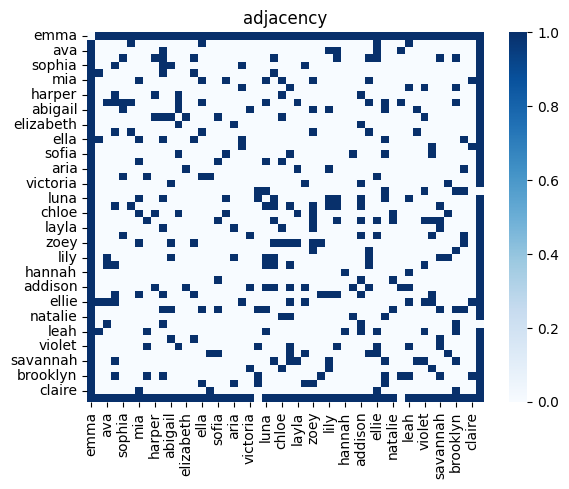

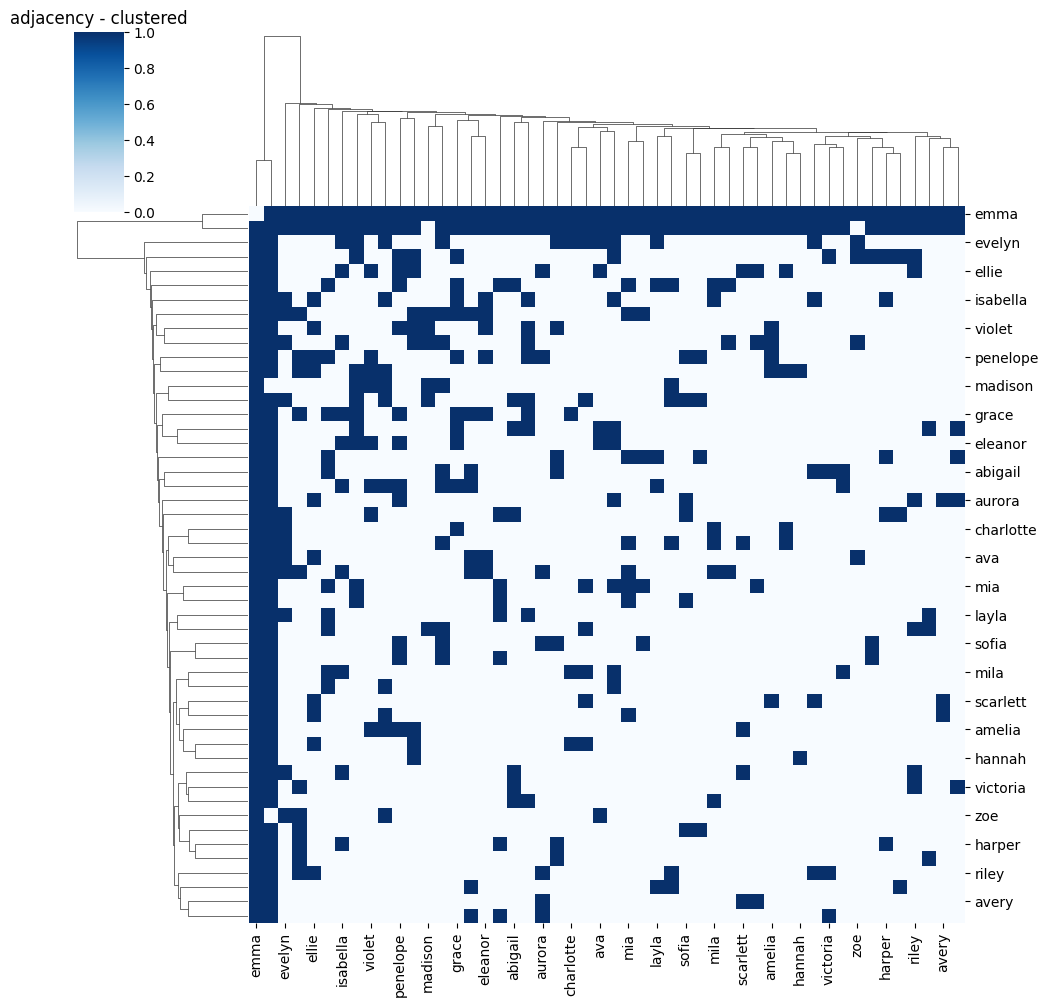

In [47]:
A    = nx.adjacency_matrix(My_NW).toarray()
A_df = pd.DataFrame(A, columns = Names, index = Names)

sns.heatmap(A_df, cmap = 'Blues')
plt.title("adjacency")
plt.show()

sns.clustermap(A_df, cmap = 'Blues')
plt.title("adjacency - clustered")
plt.show()

<br>